# A Data Science Case Study with Python

Make sure you are familiar with Chapters 1 & 2 of Nathan George's book [Practical Data Science with
Python](https://www.packtpub.com/product/practical-data-science-with-python/9781801071970).
 before diving into this notebook.

To get started, first we need to download the [City of Montreal 311 data
set](https://data.montreal.ca/dataset/5866f832-676d-4b07-be6a-e99c21eb17e4/resource/2cfa0e06-9be4-49a6-b7f1-ee9f2363a872/download/requetes311.csv). We could of course download it dynamically each time using the URL, but let's be nice to the people who host it and save a local copy as `requetes311.csv`. We can use Python to check if that file exists:

In [1]:
import os.path # load a library
filename = 'requetes311.csv' # put the filename in a string variable
if os.path.isfile(filename): # check if the file exists
    print('We have the data at hand.') # what to print out if it does
else: # and what to do if not
    print('Please download the data and put it in this same directory')

We have the data at hand.


Now, we load the data into a Pandas data frame and see what we got in terms of rows and columns. Since this is a rather large file, this might take a while. Be patient.

In [2]:
import pandas as pd # for a local installation, use pip to get pandas
print('Attempting to load the data. (Do NOT click run again.)')
# load CSV-formatted data from a file (Chapter 3 shows other ways to read data)
data = pd.read_csv(filename, low_memory = False) # explanation below
rows, cols = data.shape # consult the shape of the resulting data
print(f'There are {rows} and {cols} columns')
cells = rows * cols
assert cells == data.size # we can check this directly, too

Attempting to load the data. (Do NOT click run again.)
There are 4635093 and 29 columns


That second parameter in `read_csv` is to avoid a `DtypeWarning` that would surge because of some of the columns have both numerical and textual information. We can circumvent it for now by letting the data occupy more space instead of optimizing to fit either numbers or text in each field.

What do those columns store? Let's take a look at the *header* of the data frame that by default is the first row of the CSV file (see Chapter 3 for more information and also what to do if the file is in Excel format instead).

In [3]:
for (c, i) in zip(data.columns, range(cols)): # iterate over the contents of the header with a for loop
    print(f'Column at index {i} is called {c}')

Column at index 0 is called ID_UNIQUE
Column at index 1 is called NATURE
Column at index 2 is called ACTI_NOM
Column at index 3 is called TYPE_LIEU_INTERV
Column at index 4 is called RUE
Column at index 5 is called RUE_INTERSECTION1
Column at index 6 is called RUE_INTERSECTION2
Column at index 7 is called LOC_ERREUR_GDT
Column at index 8 is called ARRONDISSEMENT
Column at index 9 is called ARRONDISSEMENT_GEO
Column at index 10 is called LIN_CODE_POSTAL
Column at index 11 is called DDS_DATE_CREATION
Column at index 12 is called PROVENANCE_ORIGINALE
Column at index 13 is called PROVENANCE_TELEPHONE
Column at index 14 is called PROVENANCE_COURRIEL
Column at index 15 is called PROVENANCE_PERSONNE
Column at index 16 is called PROVENANCE_COURRIER
Column at index 17 is called PROVENANCE_TELECOPIEUR
Column at index 18 is called PROVENANCE_INSTANCE
Column at index 19 is called PROVENANCE_MOBILE
Column at index 20 is called PROVENANCE_MEDIASOCIAUX
Column at index 21 is called PROVENANCE_SITEINTE

Oh, look, those are in French. That's cool and also to be expected. The first one sounds a bit boring since it is just a unique ID. 

It might be good to take a look at the first few rows now before going any further as well as a few of the last rows.

In [4]:
k = 4 # how many we want to see
print('FIRST')
data.head(k)

FIRST


,ID_UNIQUE,NATURE,ACTI_NOM,TYPE_LIEU_INTERV,RUE,RUE_INTERSECTION1,RUE_INTERSECTION2,LOC_ERREUR_GDT,ARRONDISSEMENT,ARRONDISSEMENT_GEO,...,PROVENANCE_MOBILE,PROVENANCE_MEDIASOCIAUX,PROVENANCE_SITEINTERNET,UNITE_RESP_PARENT,LOC_LONG,LOC_LAT,LOC_X,LOC_Y,DERNIER_STATUT,DATE_DERNIER_STATUT
0,NaN,Information,Feux de circulation - Entretien,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,SERVICE DE L EXPÉRIENCE CITOYENNE ET DES COMMU...,NaN,NaN,NaN,NaN,NaN,2019-11-10T08:48:01
1,NaN,Information,IRP - Fermeture de rue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,DIRECTION GÉNÉRALE,NaN,NaN,NaN,NaN,NaN,2018-01-21T20:04:02
2,NaN,Information,Nid-de-poule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,DIRECTION GÉNÉRALE,NaN,NaN,NaN,NaN,NaN,2018-01-21T20:26:01
3,NaN,Information,Eau - Divers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,DIRECTION GÉNÉRALE,NaN,NaN,NaN,NaN,NaN,2018-01-22T00:03:17


Okay, there are a bunch of `NaN`s in there. That means "not a number" and in this context tells us that when a particular value is absent for a particular row. So, not all columns apply to all rows and there must be a column that lets us determine the type of a record (row). Some of the ones we inspected above, like `NATURE` seem viable candidates for this type of subsetting. But first, let's also look at the last few columns with `tail`.

In [5]:
print('LAST')
data.tail(k)

LAST


,ID_UNIQUE,NATURE,ACTI_NOM,TYPE_LIEU_INTERV,RUE,RUE_INTERSECTION1,RUE_INTERSECTION2,LOC_ERREUR_GDT,ARRONDISSEMENT,ARRONDISSEMENT_GEO,...,PROVENANCE_MOBILE,PROVENANCE_MEDIASOCIAUX,PROVENANCE_SITEINTERNET,UNITE_RESP_PARENT,LOC_LONG,LOC_LAT,LOC_X,LOC_Y,DERNIER_STATUT,DATE_DERNIER_STATUT
4635089,13-313550-D,Requete,Fuite d'eau,Troncon,rue de Port-Royal,rue Meunier,avenue de l'Esplanade,0.0,Ahuntsic - Cartierville,Ahuntsic-Cartierville,...,0,0,0,AHUNTSIC-CARTIERVILLE,-73.659221,45.542706,292366.246000,5.044767e+06,Prise en charge,2020-07-22T06:51:11
4635090,13-313550-C,Requete,Fuite d'eau,Troncon,rue de Port-Royal,rue Meunier,avenue de l'Esplanade,0.0,Ahuntsic - Cartierville,Ahuntsic-Cartierville,...,0,0,0,AHUNTSIC-CARTIERVILLE,-73.659221,45.542706,292366.246000,5.044767e+06,Terminée,2018-05-03T08:06:30
4635091,13-313550-B,Requete,Fuite d'eau,Troncon,rue de Port-Royal,rue Meunier,avenue de l'Esplanade,0.0,Ahuntsic - Cartierville,Ahuntsic-Cartierville,...,0,0,0,AHUNTSIC-CARTIERVILLE,-73.659221,45.542706,292366.246000,5.044767e+06,Terminée,2018-01-17T10:37:13
4635092,10-182618-A,Requete,Trottoir ou bordure - Réparation,Adresse,rue De Castelnau,NaN,NaN,0.0,Villeray-Saint-Michel - Parc-Extension,Villeray-Saint-Michel-Parc-Extension,...,0,0,0,VILLERAY - ST-MICHEL - PARC-EXTENSION,-73.619035,45.536318,295503.353734,5.044052e+06,Terminée,2018-11-01T06:51:40


If we want to extract a specific row based in its row number, we can do that, too.

In [6]:
print(data.iloc[1000000])

ID_UNIQUE                                  NaN
NATURE                             Information
ACTI_NOM                     Avis d'ébullition
TYPE_LIEU_INTERV                           NaN
RUE                                        NaN
RUE_INTERSECTION1                          NaN
RUE_INTERSECTION2                          NaN
LOC_ERREUR_GDT                             NaN
ARRONDISSEMENT                             NaN
ARRONDISSEMENT_GEO                         NaN
LIN_CODE_POSTAL                            NaN
DDS_DATE_CREATION          2017-09-27T16:55:07
PROVENANCE_ORIGINALE                 Téléphone
PROVENANCE_TELEPHONE                         1
PROVENANCE_COURRIEL                          0
PROVENANCE_PERSONNE                          0
PROVENANCE_COURRIER                          0
PROVENANCE_TELECOPIEUR                       0
PROVENANCE_INSTANCE                          0
PROVENANCE_MOBILE                            0
PROVENANCE_MEDIASOCIAUX                      0
PROVENANCE_SI

The first row has index zero, as usual in Python. To access the last one, we can use `-1` and for second-to-last, `-2`, and so forth. By providing two indices, we can pick a column as well, and by intervals, specific pieces. Let's get the second and the third column for rows at indices 500 to 504, as an example.

In [7]:
print(data.iloc[500:505, 1:3])

          NATURE                                  ACTI_NOM
500  Information              Occupation du domaine public
501  Information  Fermeture d'une conduite d'eau - Urgence
502  Information          Panne de service d'eau - Urgence
503  Information          Panne de service d'eau - Urgence
504  Information                          Permis animalier


It would be nice to know **how many unique values** each column contains.

In [8]:
counts = data.nunique(axis = 0)
print('This will also take a long time.')
for (c, u) in zip(data.columns, counts): # zero means iterate over rows, one would mean to iterate over columns
    print(f'Column <{c}> contains {u} unique values')

This will also take a long time.
Column <ID_UNIQUE> contains 2279791 unique values
Column <NATURE> contains 4 unique values
Column <ACTI_NOM> contains 1793 unique values
Column <TYPE_LIEU_INTERV> contains 4 unique values
Column <RUE> contains 4808 unique values
Column <RUE_INTERSECTION1> contains 4510 unique values
Column <RUE_INTERSECTION2> contains 4606 unique values
Column <LOC_ERREUR_GDT> contains 2 unique values
Column <ARRONDISSEMENT> contains 36 unique values
Column <ARRONDISSEMENT_GEO> contains 34 unique values
Column <LIN_CODE_POSTAL> contains 34785 unique values
Column <DDS_DATE_CREATION> contains 4448098 unique values
Column <PROVENANCE_ORIGINALE> contains 9 unique values
Column <PROVENANCE_TELEPHONE> contains 47 unique values
Column <PROVENANCE_COURRIEL> contains 19 unique values
Column <PROVENANCE_PERSONNE> contains 20 unique values
Column <PROVENANCE_COURRIER> contains 7 unique values
Column <PROVENANCE_TELECOPIEUR> contains 6 unique values
Column <PROVENANCE_INSTANCE> co

We have already learned something! There are *fewer unique IDs than there are rows* in the data, some of the rows appear to be follow-ups to earlier rows. This is vital information if we want to know how many different incidents are reported in the data set since we can no longer assume that each row refers to a distinct incident. 

There are latitudes (`LOC_LAT`) and longitudes in there (`LOC_LONG`). Let's look at the statistics, keeping in mind that Montreal is at 45.5017 North (positive, South would be negative) and 73.5673 West (negative, East would be positive).

In [9]:
pd.set_option('display.float_format', lambda x: '%.4f' % x) # show four decimal places
print('\nLatitude')
print(data['LOC_LAT'].describe())
print('\nLongitude')
print(data['LOC_LONG'].describe())


Latitude
count   2279008.0000
mean         45.5331
std           0.1152
min          -0.0000
25%          45.4979
50%          45.5287
75%          45.5677
max          45.7038
Name: LOC_LAT, dtype: float64

Longitude
count   2279008.0000
mean        -73.6171
std           0.0756
min         -76.2373
25%         -73.6504
50%         -73.6016
75%         -73.5689
max         -73.4791
Name: LOC_LONG, dtype: float64


Those minimums around zero do not sound correct fot the latitudes. Let's look at them in more detail.

In [10]:
data.loc[data['LOC_LAT'] < 1]

,ID_UNIQUE,NATURE,ACTI_NOM,TYPE_LIEU_INTERV,RUE,RUE_INTERSECTION1,RUE_INTERSECTION2,LOC_ERREUR_GDT,ARRONDISSEMENT,ARRONDISSEMENT_GEO,...,PROVENANCE_MOBILE,PROVENANCE_MEDIASOCIAUX,PROVENANCE_SITEINTERNET,UNITE_RESP_PARENT,LOC_LONG,LOC_LAT,LOC_X,LOC_Y,DERNIER_STATUT,DATE_DERNIER_STATUT
3191744,19-325833,Requete,Eau - Divers,Intersection,NaN,NaN,NaN,0.0000,Villeray-Saint-Michel - Parc-Extension,NaN,...,0,0,0,VILLERAY - ST-MICHEL - PARC-EXTENSION,-76.2373,-0.0000,-1.0000,-1.0000,Terminée,2020-10-19T10:22:34
4246065,16-98270,Requete,Nettoyage du domaine public,Troncon,rue Provost,avenue 19e,avenue 20e,0.0000,Lachine,NaN,...,0,0,0,LACHINE,-76.2373,0.0000,0.0000,0.0000,Terminée,2016-06-03T09:38:57
4251838,16-93011,Requete,Nid-de-poule,Troncon,rue Provost,avenue 36e,avenue 37e,0.0000,Lachine,NaN,...,0,0,0,LACHINE,-76.2373,0.0000,0.0000,0.0000,Terminée,2016-06-01T09:03:34
4287483,16-60515,Requete,IRP - Fermeture de rue,Troncon,rue Provost,avenue 8e,avenue 9e,0.0000,Lachine,NaN,...,0,0,0,LACHINE,-76.2373,0.0000,0.0000,0.0000,Terminée,2016-03-14T13:48:40
4288065,16-59984,Requete,Nid-de-poule,Troncon,avenue 11e,rue Notre-Dame,rue William-MacDonald,0.0000,Lachine,NaN,...,0,0,0,LACHINE,-76.2373,0.0000,0.0000,0.0000,Terminée,2016-03-23T13:45:54
4288650,16-59450,Requete,Nid-de-poule,Troncon,avenue 11e,rue Notre-Dame,rue William-MacDonald,0.0000,Lachine,NaN,...,0,0,0,LACHINE,-76.2373,0.0000,0.0000,0.0000,Terminée,2016-03-23T13:45:31
4289385,16-58785,Requete,Nid-de-poule,Troncon,avenue 11e,rue Notre-Dame,rue William-MacDonald,0.0000,Lachine,NaN,...,0,0,0,LACHINE,-76.2373,0.0000,0.0000,0.0000,Terminée,2016-03-23T13:46:12
4292313,16-56106,Requete,Nid-de-poule,Troncon,rue Provost,avenue 36e,avenue 37e,0.0000,Lachine,NaN,...,0,0,0,LACHINE,-76.2373,0.0000,0.0000,0.0000,Terminée,2016-05-24T16:21:10
4296927,16-51881,Requete,*Déneigeur privé,Troncon,avenue 10e,rue Provost,rue Sherbrooke,0.0000,Lachine,NaN,...,0,0,0,LACHINE,-76.2373,0.0000,0.0000,0.0000,Supprimée,2016-06-05T13:00:57
4305363,16-44224,Requete,IRP - Fermeture de rue,Troncon,rue Provost,avenue 8e,avenue 9e,0.0000,Lachine,NaN,...,0,0,0,LACHINE,-76.2373,0.0000,0.0000,0.0000,Terminée,2016-02-24T13:23:15


Looks like someone somehow forgot to register those. Let's plot the *others* .

<AxesSubplot:xlabel='LOC_LONG', ylabel='LOC_LAT'>

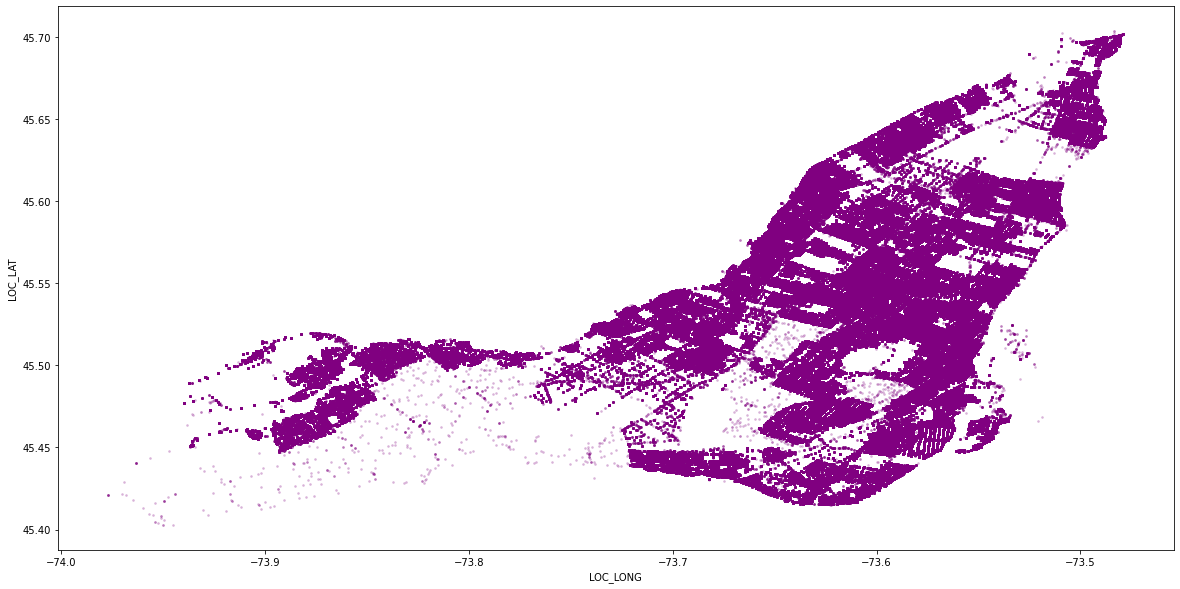

In [11]:
valid = data.loc[data['LOC_LAT'] > 40] # at least be near Canada in terms of the latitude
# small and semitransparent dots to help visualize density
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10] # bigger plots
valid.plot.scatter(x = 'LOC_LONG', y = 'LOC_LAT', s = 3, alpha = 0.2, color = 'purple') 

This would be way cooler on a map. First, we need to find open data for a map of Montreal. Luckily there is a [portal just for that](https://open.canada.ca/data/en/dataset?q=montreal&organization=qc&jurisdiction=municipal&frequency=irregular&collection=fgp&res_format=GEOJSON&sort=) and [the map of the polygons of the administrative limits](https://data.montreal.ca/dataset/00bd85eb-23aa-4669-8f1b-ba9a000e3dd8/resource/e9b0f927-8f75-458c-8fda-b5da65cc8b73/download/limadmin.geojson) sounds promising. Let's save that GeoJSON file locally in the same folder with the CSV data as `limadmin.geojson`. We can overlay this on a map of Canada, if we wish. And on that, we can download and overlay [the regions of Quebec](https://gist.github.com/carmoreira/73f4d87b7c42834669dd8f734b1e3a58#file-quebec_regions-geojson) if we download that, too.

/home/elisa/.local/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


<AxesSubplot:>

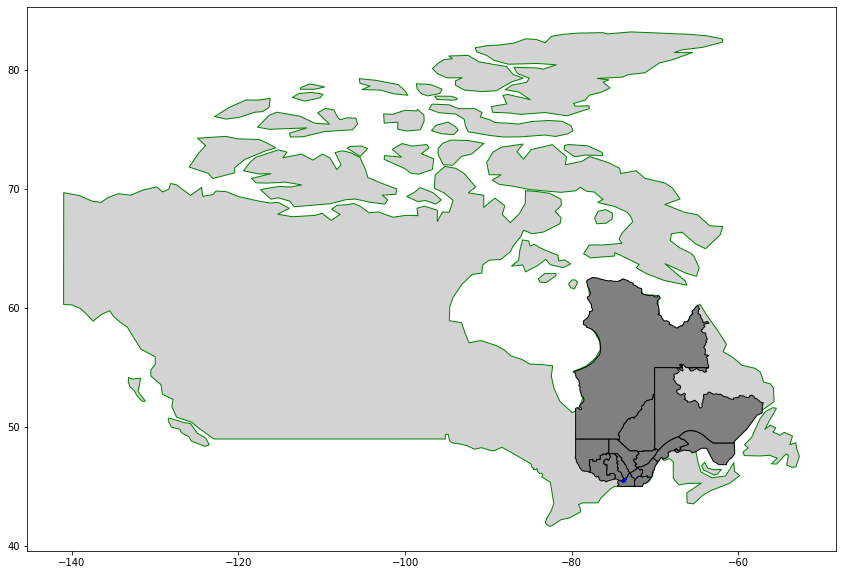

In [12]:
import geopandas as gpd # install with pip for your local python installation
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # fetch
fig, ax = plt.subplots(1, 1) # we want to plot many things on the same figure
canada = countries[countries['name'] == 'Canada']
canada.plot(edgecolor = 'green', color = 'lightgray', ax = ax)
quebec = gpd.read_file('quebec_regions.geojson')
quebec.plot(edgecolor = 'black', color = 'gray', ax = ax) # on the same plot
montreal = gpd.read_file('limadmin.geojson')
montreal.plot(edgecolor = 'blue', color = 'black', ax = ax)

We could [use a real map as background](https://geopandas.org/en/stable/gallery/plotting_basemap_background.html) and varying levels of transparency (`alpha`) on the indicated areas.

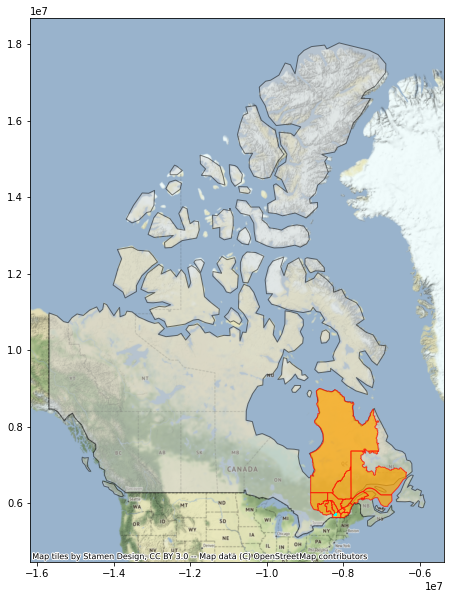

In [13]:
import contextily as cx # install with pip

webmercator = 3857 
# ensure a coordinate system compatible with maps on the web

c = canada.to_crs(epsg = webmercator)
q = quebec.to_crs(epsg = webmercator)
m = montreal.to_crs(epsg = webmercator)

fig, ax = plt.subplots(1, 1)
c.plot(edgecolor = 'black', color = 'lightgray', alpha = 0.5, ax = ax)
q.plot(edgecolor = 'red', color = 'orange', alpha = 0.7, ax = ax) 
m.plot(edgecolor = 'cyan', color = 'blue', alpha = 0.9, ax = ax)
cx.add_basemap(ax)

We barely notice Montreal since Canada is way too big. We have to zoom in. In fact, best ditch the country altogether and just plot Quebec and Montreal.

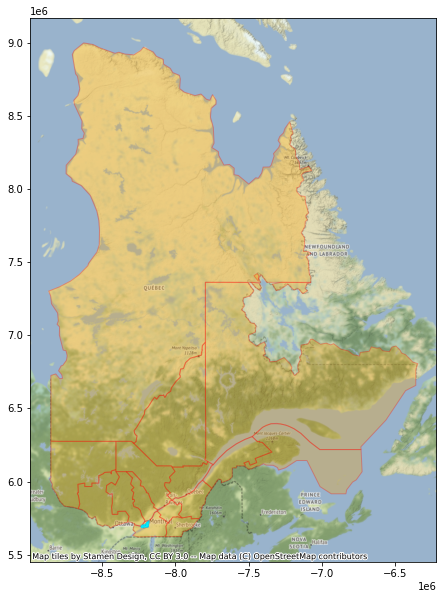

In [14]:
fig, ax = plt.subplots(1, 1)
q.plot(edgecolor = 'red', color = 'orange', alpha = 0.3, ax = ax) 
m.plot(edgecolor = 'cyan', color = 'blue', alpha = 0.5, ax = ax)
cx.add_basemap(ax)

Yeah, Quebec is too big, too. Let's just keep the administrative limits

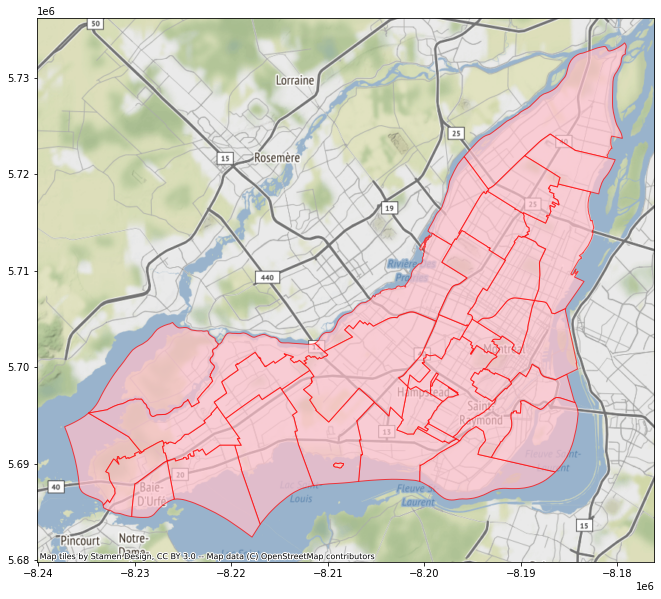

In [15]:
fig, ax = plt.subplots(1, 1)
m.plot(edgecolor = 'red', color = 'pink', alpha = 0.7, ax = ax)
cx.add_basemap(ax)

So, how do we plot the data set onto this map? Let's return to the non-background variant for a bit.

<AxesSubplot:xlabel='LOC_LONG', ylabel='LOC_LAT'>

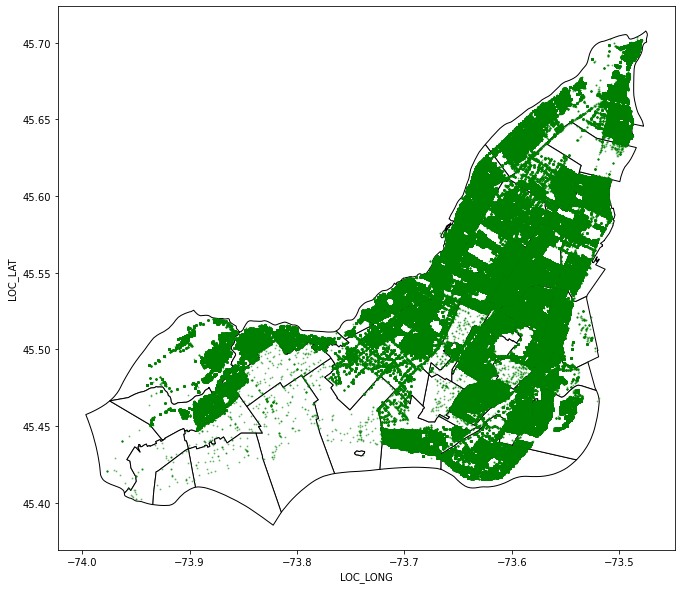

In [16]:
fig, ax = plt.subplots(1, 1)
montreal.plot(edgecolor = 'black', color = 'white', ax = ax)
valid.plot.scatter(x = 'LOC_LONG', y = 'LOC_LAT', s = 1, alpha = 0.4, 
                   color = 'green', ax = ax) 

We could zoom in on a zone of interest by controlling the axes.

(45.46, 45.52)

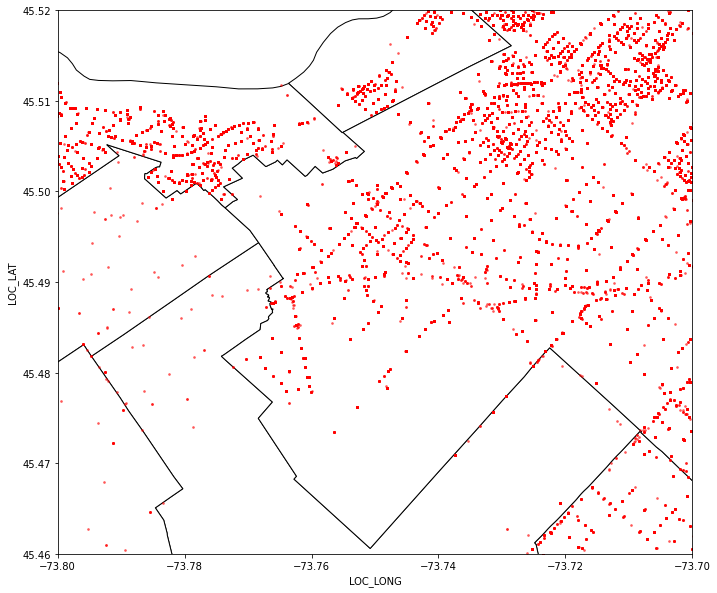

In [17]:
fig, ax = plt.subplots(1, 1)
montreal.plot(edgecolor = 'black', color = 'white', ax = ax)
valid.plot.scatter(x = 'LOC_LONG', y = 'LOC_LAT', s = 3, 
                   alpha = 0.5, color = 'red', ax = ax) 
plt.xlim([-73.8, -73.7])
plt.ylim([45.46, 45.52])

Yes, maps are neat. Many of the points seem to be on streets. We can test this hypothesis informally by drawing the streets, too. Download the street data into [`geobase.json`](https://donnees.montreal.ca/ville-de-montreal/geobase). 

Adding the streets. This takes a VERY long time.
Coordinate system epsg:4326


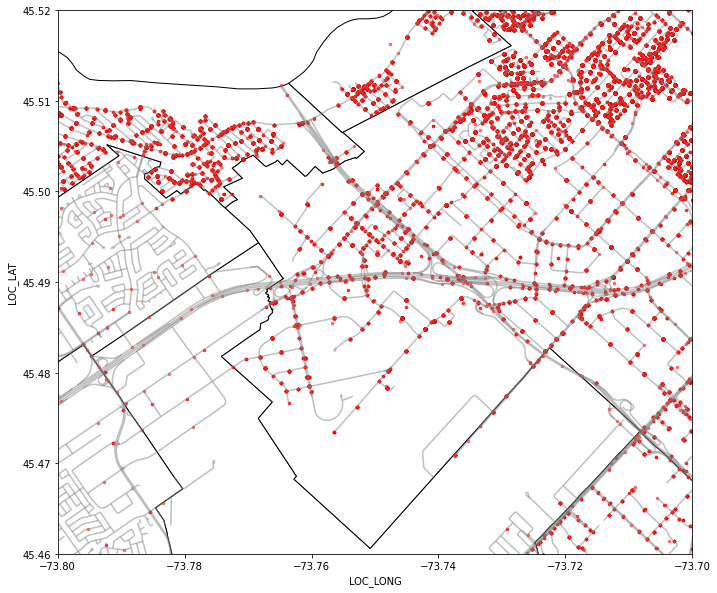

In [18]:
streets = gpd.read_file('geobase.json') # this is huge, the drawing will take a long while
fig, ax = plt.subplots(1, 1)
montreal.plot(edgecolor = 'black', color = 'white', ax = ax)
plt.xlim([-73.8, -73.7])
plt.ylim([45.46, 45.52])
streets.plot(color = 'gray', ax = ax, alpha = 0.5)
print('Adding the streets. This takes a VERY long time.')
valid.plot.scatter(x = 'LOC_LONG', y = 'LOC_LAT', s = 6, 
                   alpha = 0.5, color = 'red', ax = ax) 
print('Coordinate system', streets.crs) # what coordinate system is this anyhow?

And if we want the background map instead of the street data? We need a georeferenced version of the data. 

In [69]:
print('Building a geo-referenced data frame (this takes a little while)')
v = gpd.GeoDataFrame(valid, 
                     geometry = gpd.points_from_xy(valid.LOC_LONG, valid.LOC_LAT),
                     crs = 4326) # start with longitude and latitude
v = v.to_crs(webmercator) # to the same projection
print('Done')

Building a geo-referenced data frame (this takes a little while)
Done


Now we can draw that on top of the web-mercator version of Montreal. Since drawing all the records is very slow, we can just use a random sample.

Plotting 100 records at random
Adding the background map


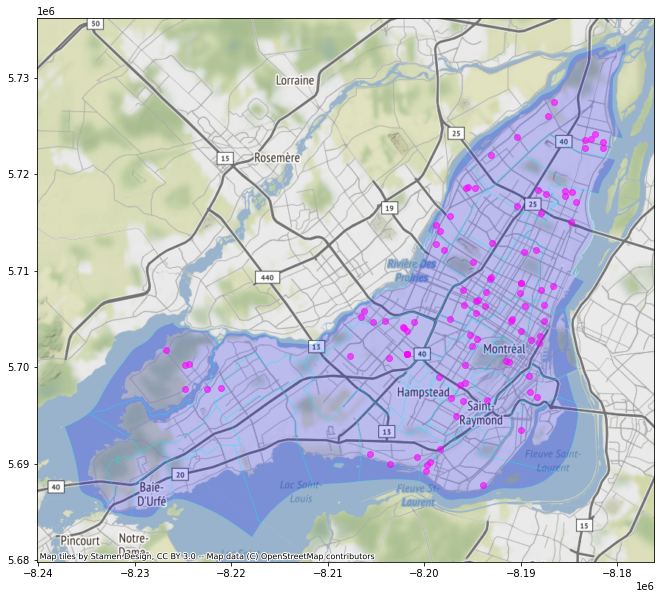

In [73]:
fig, ax = plt.subplots(1, 1)
m.plot(edgecolor = 'cyan', color = 'blue', alpha = 0.2, ax = ax)
k = 100
print(f'Plotting {k} records at random')
some = v.sample(k)
some.plot(color = 'magenta', alpha = 0.6, ax = ax) 
print('Adding the background map')
cx.add_basemap(ax)

Now, suppose we prefer using the street information instead of a background map. 

Since loading *all* of the streets takes so long, we should just make a smaller version with only Montreal streets in it. 

We have a data frame of the Quebec regions, so we can surely find a polygon to represent Montreal there.

In [22]:
print(quebec)

    cartodb_id  res_co_reg  regio_s_id  regio_s_ res_co_ver res_co_ref  \
0           10           7          12        11   V2012-05     BDGA1M   
1            4           2           6         5   V2012-05     BDGA1M   
2            5          11           7         6   V2012-05     BDGA1M   
3            7           8           9         8   V2012-05     BDGA1M   
4            8           4          10         9   V2012-05     BDGA1M   
5            9           3          11        10   V2012-05     BDGA1M   
6           11          15          13        12   V2012-05     BDGA1M   
7           13          12          15        14   V2012-05     BDGA1M   
8           12          14          14        13   V2012-05     BDGA1M   
9           15          16          17        16   V2012-05     BDGA1M   
10          16           5          18        17   V2012-05     BDGA1M   
11          19          10           1        20   V2012-05     BDGA1M   
12          17           6          19

There it is: we want the `geometry` of the row on which `res_nm_reg` says "Montréal".

In [ ]:
city = quebec[quebec['res_nm_reg'] == 'Montréal'].geometry
print(city)
print(len(streets), 'streets in total')
citystreets = streets.clip(city) # install the pygeos package with pip
print(len(citystreets), 'of them in Montreal')

Well, that was not a huge savings, but it's something.

To understand more of what is happening with the rest of the data, we can start by looking at the columns that only have a handful of unique values. Let's filter out which columns have less than ten unique values:

In [ ]:
few = [ data.columns[i] for i in range(cols) if counts[i] < 10 ]
for c in few: # take a look at the values
    for v in data[c].unique():
        print(f'Column <{c}> can take on the value "{v}"')
    print('') # just a blank line between columns

There were some records (rows) that had cells (values) set to `nan` (for example in `LOC_ERREUR_GDT`) which probably means 'NaN' to indicate that the value is *not available*. We can try to set the string 'nan' to a NaN just in case; often people who populate data sheets use their own notation to indicate that a value is not available and consistency is needed.

Additionally, it may come handy to know how many NAs there are: `isna` will produce `True` or `False` for each cell to indicate whether or not the value is "Not Available". If we sum over that data frame of pure truth values, we find out how many there are in total per column.

So, let's check how many NAs there are, and then see if substituting any 'nan' strings makes a difference.

In [ ]:
NAs = data.isna().sum()
print(NAs)
print('Before (total)', NAs.sum()) # how many NaN there are 
data = data.replace('nan', pd.NA) # make those nan into NaN
NAs = data.isna().sum() # update the value of NaNs
print('After (total)', NAs.sum()) # how many there are now

Let's make pie charts for each of these so we can visualize how these possible values are distributed in terms of their frequency.

In [ ]:
from math import ceil # round up
k = len(few)
# putting the pies in three rows
rc = 3
cc = int(ceil(k / rc)) # columns for the plots
fig, axs = plt.subplots(rc, cc)
i = 0 # the first plot goes on the first row
j = 0 # ... in the first column
for c in few: 
    freq = data[c].value_counts(dropna = True) # ignore any NaN values
    vals = data[c].unique()
    axs[i, j].set_title(c)
    axs[i, j].pie(freq)
    print(f'\nValue frequencies for column <{c}>:')
    print('\n'.join([f'{v}: {f}' for (v, f) in zip(vals, freq)]))
    j += 1
    if j == cc: # time for the second row
        i += 1
        j = 0 # continue at the first column

Those numerical codes 0, 1, 2, 3, ..., seems like categories. Let's consult [the source of the data](https://donnees.montreal.ca/ville-de-montreal/requete-311#methodology) to understand this better. All of the 'PROVENANCE' are *counters* for how many distinct contacts have there been per contact medium. 

So, the clearest *categorical* data we have is the column `NATURE` that has possible values 
"Information", "Commentaire", "Requete" y "Plainte" (the last one meaning "complaint"). It would be neat to be able to plot a map where each kind of record (row) has its own color. 

Remember that `valid` is the subset of data in which only those with valid geographical coordinates are included (some has mystery zero latitudes). Let's try to find a zone that incluides all four types of records:

In [ ]:
kinds = valid.groupby('NATURE')
latavg = []
latsd = []
lonavg = []
lonsd = []
for kind in valid['NATURE'].unique():
    print('\n', kind)
    matches = kinds.get_group(kind)
    print(matches['LOC_LAT'].describe())
    latavg.append(matches['LOC_LAT'].mean())
    latsd.append(matches['LOC_LAT'].std())
    print(matches['LOC_LONG'].describe())
    lonavg.append(matches['LOC_LONG'].mean())
    lonsd.append(matches['LOC_LONG'].std())

Note that *none* of the `Information` category have valid geographical coordinates. We could pick a zone that is centered at the average of the means and a width of half the smallest standard deviation in total, for example.

In [ ]:
import numpy as np # install with pip if you do not have NumPy yet
xcenter = np.mean(lonavg)
xspan = np.min(lonsd) / 4
ycenter = np.mean(latavg)
yspan = np.min(latsd) / 4
# build a zone to visualize
xlim = [xcenter - xspan, xcenter + xspan] # a quarter each side
ylim = [ycenter - yspan, ycenter + yspan]
print(xlim, ylim)

Let's make a zone and see if this cuts the dataset down to something that is easier to visualize.

In [ ]:
# reorganize the info for a more geo-reference friendly format 
from shapely.geometry import Polygon # make sure shapely is installed with pip

# this is just a rectangle, really
zone = Polygon([(xlim[0], ylim[0]), 
                (xlim[0], ylim[1]), 
                (xlim[1], ylim[1]), 
                (xlim[1], ylim[0]), 
                (xlim[0], ylim[0])])
print('Selecting', zone)

# which points are inside this area
inside = valid.loc[ (valid['LOC_LONG'] > xlim[0]) & 
                    (valid['LOC_LONG'] < xlim[1]) &
                    (valid['LOC_LAT'] > ylim[0]) & 
                    (valid['LOC_LAT'] < ylim[1]) ]

print(len(inside), 'records in the zone')
print(inside['NATURE'].value_counts()) # how many of each kind

Nice, that sounds manageable. Let's limit the streets to that same zone. 

In [ ]:
r = v.clip(zone) # clip the records with valid coordinates
print(len(r), 'records clipped')
s = citystreets.clip(zone) # clip the street map further
print(len(s), 'streets in the zone')

OK, we are ready to make a map, again.

In [ ]:
fig, ax = plt.subplots(1, 1)
plt.xlim(xlim)
plt.ylim(ylim)
s.plot(color = 'gray', ax = ax, alpha = 0.5) # draw the streets
# draw the records with colors by category and a legend
r.plot(column = 'NATURE', categorical = True, legend = True, alpha = 0.5, ax = ax) 

As expected, we really only see those of category "Requete" that is quite dominant in terms of frequency. The other two options are much more rare. Let's try to look at them without the dominant class and also without the streets.

Also, the colormap in the original plot is pretty bad: it is hard to distinguish between the tones. We can change it manually to [some other palette available in matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html?highlight=cmap).

In [ ]:
fig, ax = plt.subplots(1, 1)
plt.xlim(xlim)
plt.ylim(ylim)       
small = r.loc[r['NATURE'] != 'Requete']
small.plot(column = 'NATURE', cmap = 'cool', 
           categorical = True, legend = True, alpha = 0.5, ax = ax) 

We could also draw the underdog categories with bigger markers to be able to notice them better.  Let's create a new column for that.

In [ ]:
r['size'] = [ 5 + 20 * (v != 'Requete') + 50 * (v == 'Plainte') for v in r['NATURE'] ] 
f = r['size'].value_counts() 
v = r['size'].unique()
patches, texts = plt.pie(f)
plt.legend(patches, v, loc = 'lower right', 
           bbox_to_anchor = (-0.1, 1.), fontsize = 8)

Now there should be three different sizes of markers. It might be good to ditch the transparency (the `alpha` parameter) from the markers. Instead of drawing the streets, we could use a map background again.

In [ ]:
fig, ax = plt.subplots(1, 1)
plt.xlim(xlim)
plt.ylim(ylim)
r.plot(column = 'NATURE', 
       categorical = True, 
       legend = True, 
       cmap = 'spring', 
       markersize = r['size'], 
       ax = ax) 
fig.set_facecolor('darkgray')
cx.add_basemap(ax)

That `markersize` parameter does not seem to be a linear mapping of the numerical values given to it, but at least now there are visible differences. 